In [1]:
#testing how git commits works
#import statements
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [151]:
#importing testing and training data
train = pd.read_csv('/home/dan/Documents/titanic/data/train.csv')
test = pd.read_csv('/home/dan/Documents/titanic/data/test.csv')


In [152]:
train = train.dropna()
train_x = train.loc[:,['Age','SibSp']]
train_y = train['Survived']

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [153]:
#test_x = test.loc[:,['Fare','Age']].dropna()
#knn.predict(test_x).shape

In [154]:
#accuracy on test data split from train data
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, random_state = 21)
knn2= KNeighborsClassifier(n_neighbors = 4)
knn2.fit(x_train, y_train)
knn2.score(x_test,y_test)

0.8260869565217391

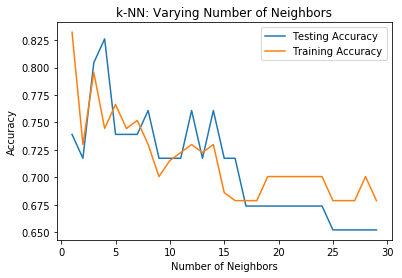

In [156]:
#plot copied from datacamp (overfitting and underfitting)
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn3 = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn3.fit(x_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn3.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn3.score(x_test,y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()